A1. The matrix multiplication of an (n, k) matrix and a (k, m) matrix involves computing each element of the resulting (n, m) matrix. For each element c_{ij} in the resulting matrix, you need to perform k multiplications and (k-1) additions. For a single c_{ij} element:


\begin{align*}
\text{Multiplications:} & \quad a_{i1}b_{1j}, a_{i2}b_{2j}, \ldots, a_{ik}b_{kj} \\
\text{Additions:} & \quad + \text{ between the above multiplications} \\
\text{Total Multiplications:} & \quad n \times k \times m \\
\text{Total Additions:} & \quad n \times (k-1) \times m
\end{align*}


A2. Custom method for matrix multiplication

In [1]:
import jax
import jax.numpy as jnp

In [3]:
import numpy as np
import time

def matrix_multiply_lists(matrix_a, matrix_b):
    result = [[0 for _ in range(len(matrix_b[0]))] for _ in range(len(matrix_a))]

    for i in range(len(matrix_a)):
        for j in range(len(matrix_b[0])):
            for k in range(len(matrix_b)):
                result[i][j] += matrix_a[i][k] * matrix_b[k][j]

    return result

matrix_a = np.random.random((50, 50))
matrix_b = np.random.random((50, 50))

start_time_lists = time.time()
result_lists = matrix_multiply_lists(matrix_a, matrix_b)
end_time_lists = time.time()
time_taken_lists = end_time_lists - start_time_lists

print(f"Time taken using lists of lists: {time_taken_lists:.6f} seconds")

matrix_a_np = np.array(matrix_a)
matrix_b_np = np.array(matrix_b)

start_time_numpy = time.time()
result_numpy = np.dot(matrix_a_np, matrix_b_np)
end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

print(f"Time taken using NumPy: {time_taken_numpy:.6f} seconds")



Time taken using lists of lists: 0.106035 seconds
Time taken using NumPy: 0.000714 seconds


Typically, NumPy outperforms the pure Python list-based method for matrix multiplication due to its optimization for numerical operations and implementation in C. NumPy is designed to be highly efficient, leveraging optimized linear algebra libraries. The timing results affirm that, especially for larger matrices, the NumPy solution demonstrates significantly faster performance.

A3. To find the median of an array using the method described, we would need to perform multiple passes through the array to identify the highest and second highest elements, and so on, until we reach the middle element for an odd-sized array or the average of the two middle elements for an even-sized array.

To determine the median in an array of size n using the current method, it would necessitate approximately n/2 passes, resulting in a time complexity of approximately O(n^2). A more efficient approach involves initially sorting the array and subsequently identifying the median.

In [8]:
import numpy as np
import time

def find_largest_element(arr):
    largest = arr[0]
    for i in range(len(arr)):
        if arr[i] > largest:
            largest = arr[i]
    return largest

def calculate_custom_median(arr):
    n = len(arr)
    if n % 2 == 1:
        for i in range(int(n / 2)):
            k = find_largest_element(arr)
            arr.remove(k)
        median = find_largest_element(arr)
    else:
        for i in range(int(n / 2) - 1):
            k = find_largest_element(arr)
            arr.remove(k)
        median1 = find_largest_element(arr)
        arr.remove(median1)
        median2 = find_largest_element(arr)
        median = (median1 + median2) / 2
    return median

def perform_quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return perform_quicksort(less) + [pivot] + perform_quicksort(greater)

def calculate_sorted_median(arr):
    sorted_arr = perform_quicksort(arr)
    n = len(sorted_arr)
    median_index = n // 2
    if n % 2 == 0:
        return (sorted_arr[median_index - 1] + sorted_arr[median_index]) / 2
    else:
        return sorted_arr[median_index]

# Generate a random array
random_array = np.random.randint(1, 100, 500)

start_time_numpy = time.time()
numpy_median = np.median(random_array)
end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

start_time_sorted_median = time.time()
sorted_median = calculate_sorted_median(random_array.tolist())
end_time_sorted_median = time.time()
time_taken_sorted_median = end_time_sorted_median - start_time_sorted_median

start_time_custom_median = time.time()
custom_median_result = calculate_custom_median(random_array.tolist())
end_time_custom_median = time.time()
time_taken_custom_median = end_time_custom_median - start_time_custom_median

print("Median (using numpy):", numpy_median, "Time", time_taken_numpy)
print("Median (using sorted method):", sorted_median, "Time", time_taken_sorted_median)
print("Median (using custom method):", custom_median_result, "Time", time_taken_custom_median)


Median (using numpy): 51.0 Time 0.0003314018249511719
Median (using sorted method): 51.0 Time 0.00241851806640625
Median (using custom method): 51.0 Time 0.006821870803833008


A4. Using the basic definition of derivative to find the gradient.

In [9]:
def my_function(x, y):
    return y*x**2 + y**3*jnp.sin(x)

def numerical_gradient_x(f, x, y, h=1e-5):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def numerical_gradient_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

x_val = 2.0
y_val = 3.0

gradient_x = numerical_gradient_x(my_function, x_val, y_val)
gradient_y = numerical_gradient_y(my_function, x_val, y_val)

print(f"Numerical gradient with respect to x at (x={x_val}, y={y_val}): {gradient_x}")
print(f"Numerical gradient with respect to y at (x={x_val}, y={y_val}): {gradient_y}")

Numerical gradient with respect to x at (x=2.0, y=3.0): 0.762939453125
Numerical gradient with respect to y at (x=2.0, y=3.0): 28.6102294921875


A5. Gradient using JAX

In [10]:
import jax
import jax.numpy as jnp

grad_my_function = jax.grad(my_function, argnums=(0, 1))

gradient_x = grad_my_function(x_val, y_val)[0]
gradient_y = grad_my_function(x_val, y_val)[1]

print(f"Gradient with respect to x at (x={x_val}, y={y_val}): {gradient_x}")
print(f"Gradient with respect to y at (x={x_val}, y={y_val}): {gradient_y}")

Gradient with respect to x at (x=2.0, y=3.0): 0.7640352249145508
Gradient with respect to y at (x=2.0, y=3.0): 28.551029205322266


Q6. Gradient using sympy

In [11]:
import sympy as sp

x, y = sp.symbols('x y')
f = y*x**2 + y**3*sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

gradient_at_point = {
    'df_dx': df_dx.subs([(x, x_val), (y, y_val)]),
    'df_dy': df_dy.subs([(x, x_val), (y, y_val)])
}

print(f"Gradient at (x={x_val}, y={y_val}):")
print(f"Partial derivative with respect to x: {gradient_at_point['df_dx']}")
print(f"Partial derivative with respect to y: {gradient_at_point['df_dy']}")

Gradient at (x=2.0, y=3.0):
Partial derivative with respect to x: 0.764035413227155
Partial derivative with respect to y: 28.5510305242934


A9

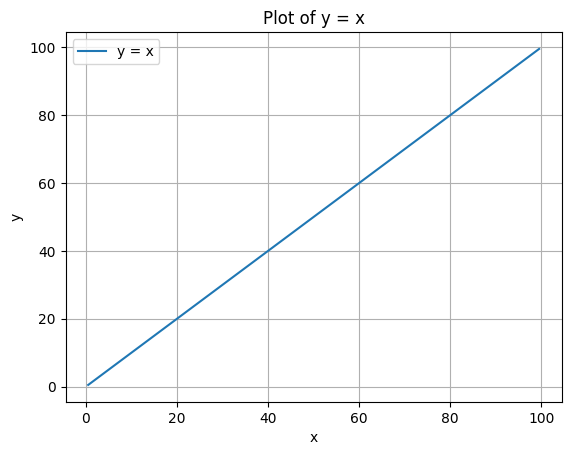

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100, 0.5)

y_values = x_values

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.grid(True)
plt.legend()
plt.show()

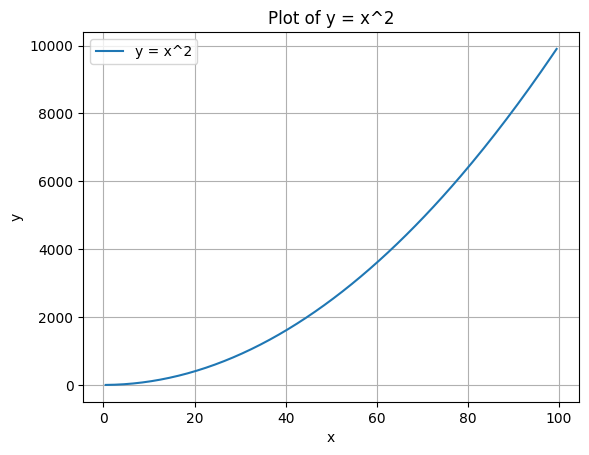

In [13]:
y_values = x_values**2

plt.plot(x_values, y_values, label='y = x^2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.grid(True)
plt.legend()
plt.show()

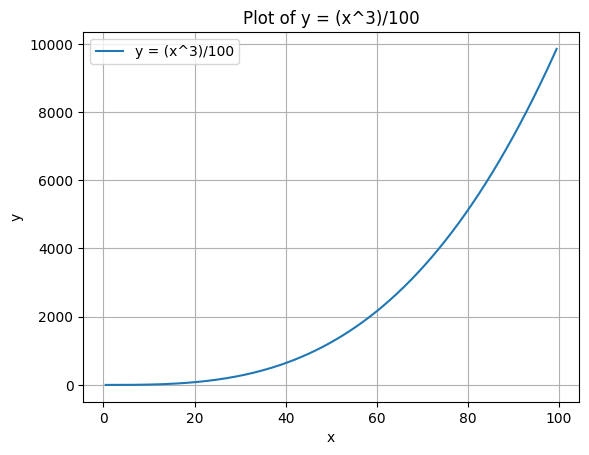

In [14]:
y_values = (x_values**3)/100

plt.plot(x_values, y_values, label='y = (x^3)/100')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = (x^3)/100')
plt.grid(True)
plt.legend()
plt.show()

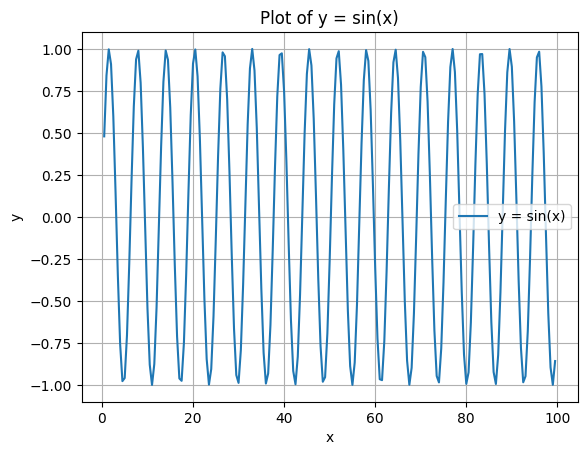

In [15]:
y_values = np.sin(x_values)

plt.plot(x_values, y_values, label='y = sin(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.grid(True)
plt.legend()
plt.show()

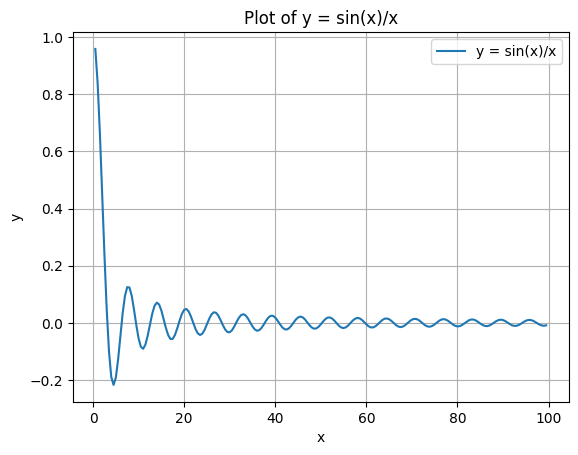

In [16]:
y_values = np.sin(x_values)/x_values

plt.plot(x_values, y_values, label='y = sin(x)/x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.grid(True)
plt.legend()
plt.show()

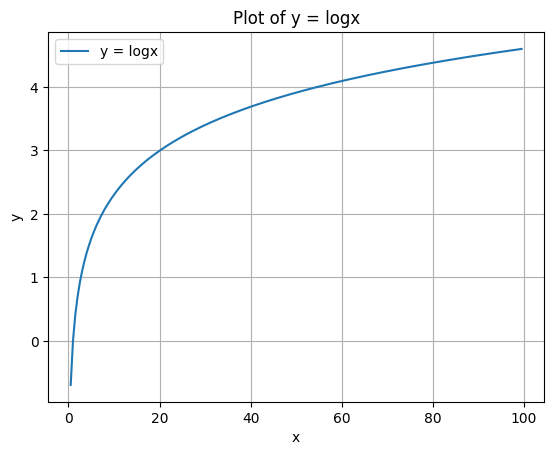

In [17]:
y_values = np.log(x_values)

plt.plot(x_values, y_values, label='y = logx')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = logx')
plt.grid(True)
plt.legend()
plt.show()

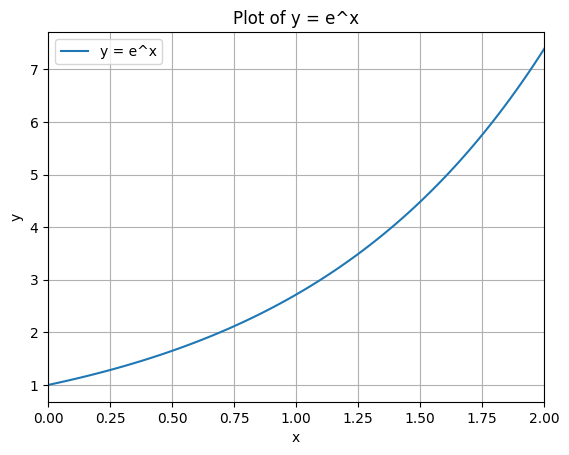

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(0, 2, 100)  # Adjust the range as needed
y_values = np.exp(x_values)

plt.plot(x_values, y_values, label='y = e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.grid(True)
plt.legend()

plt.xlim(0, 2)

plt.show()


A10. Generate a 20x5 matrix with random numbers in the range (1, 2)

In [20]:
import pandas as pd
random_matrix = np.random.uniform(1, 2, size=(20, 5))

print(random_matrix)

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

[[1.13674486 1.36301799 1.00085176 1.62304634 1.20041042]
 [1.42744573 1.51267854 1.83843064 1.13093223 1.00230628]
 [1.15423246 1.42544063 1.45467416 1.69666496 1.1775745 ]
 [1.64226673 1.79761274 1.80125072 1.14745769 1.36503478]
 [1.23422019 1.12793891 1.7417278  1.11207118 1.20355276]
 [1.62010454 1.97188322 1.36029461 1.57875622 1.61885808]
 [1.09927986 1.65773998 1.96999893 1.82172622 1.60645957]
 [1.87445757 1.17945012 1.19121287 1.8811765  1.49486057]
 [1.51294048 1.24295148 1.13411347 1.06216276 1.55139711]
 [1.36381034 1.82867582 1.17066979 1.99790441 1.44736046]
 [1.33183858 1.8942805  1.47877113 1.73549272 1.38361849]
 [1.01462138 1.51939488 1.76772807 1.88370743 1.73728276]
 [1.79788699 1.48995423 1.10083597 1.42791446 1.31680783]
 [1.09473351 1.75156506 1.16880632 1.42784658 1.34260379]
 [1.17338227 1.38622438 1.3735404  1.97138939 1.35967744]
 [1.30267577 1.33166774 1.46158344 1.77994869 1.01945402]
 [1.72085988 1.28279263 1.94196801 1.22096445 1.34514363]
 [1.38003912 1

In [21]:
max_std_column = df.std().idxmax()
max_std_column_value = df.std().max()
print("Column with the highest standard deviation:", max_std_column, "with the value:", max_std_column_value)

min_mean_row = df.mean(axis=1).idxmin()
min_mean_row_value = df.mean(axis=1).min()
print("Row with the lowest mean:", min_mean_row, "with the value of:", min_mean_row_value)

Column with the highest standard deviation: d with the value: 0.33381799796790507
Row with the lowest mean: 0 with the value of: 1.2648142758821683


A11

In [22]:
df['f'] = df.sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.136745  1.363018  1.000852  1.623046  1.200410  6.324071
1   1.427446  1.512679  1.838431  1.130932  1.002306  6.911793
2   1.154232  1.425441  1.454674  1.696665  1.177574  6.908587
3   1.642267  1.797613  1.801251  1.147458  1.365035  7.753623
4   1.234220  1.127939  1.741728  1.112071  1.203553  6.419511
5   1.620105  1.971883  1.360295  1.578756  1.618858  8.149897
6   1.099280  1.657740  1.969999  1.821726  1.606460  8.155205
7   1.874458  1.179450  1.191213  1.881177  1.494861  7.621158
8   1.512940  1.242951  1.134113  1.062163  1.551397  6.503565
9   1.363810  1.828676  1.170670  1.997904  1.447360  7.808421
10  1.331839  1.894281  1.478771  1.735493  1.383618  7.824001
11  1.014621  1.519395  1.767728  1.883707  1.737283  7.922735
12  1.797887  1.489954  1.100836  1.427914  1.316808  7.133399
13  1.094734  1.751565  1.168806  1.427847  1.342604  6.785555
14  1.173382  1.386224  1.373540  1.971389  1.359677  7

In [23]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df)

           a         b         c         d         e         f    g
0   1.136745  1.363018  1.000852  1.623046  1.200410  6.324071  LT8
1   1.427446  1.512679  1.838431  1.130932  1.002306  6.911793  LT8
2   1.154232  1.425441  1.454674  1.696665  1.177574  6.908587  LT8
3   1.642267  1.797613  1.801251  1.147458  1.365035  7.753623  LT8
4   1.234220  1.127939  1.741728  1.112071  1.203553  6.419511  LT8
5   1.620105  1.971883  1.360295  1.578756  1.618858  8.149897  GT8
6   1.099280  1.657740  1.969999  1.821726  1.606460  8.155205  GT8
7   1.874458  1.179450  1.191213  1.881177  1.494861  7.621158  LT8
8   1.512940  1.242951  1.134113  1.062163  1.551397  6.503565  LT8
9   1.363810  1.828676  1.170670  1.997904  1.447360  7.808421  LT8
10  1.331839  1.894281  1.478771  1.735493  1.383618  7.824001  LT8
11  1.014621  1.519395  1.767728  1.883707  1.737283  7.922735  LT8
12  1.797887  1.489954  1.100836  1.427914  1.316808  7.133399  LT8
13  1.094734  1.751565  1.168806  1.427847  1.34

In [24]:
lt8_count = (df['g'] == 'LT8').sum()
print("Number of rows where the value in column 'g' is 'LT8':", lt8_count)

Number of rows where the value in column 'g' is 'LT8': 16


In [28]:
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Standard deviation of column 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of column 'f' for 'GT8' rows:", std_gt8)

Standard deviation of column 'f' for 'LT8' rows: 1.0882404950799613
Standard deviation of column 'f' for 'GT8' rows: 0.11955177919918676


A12

In [29]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([7, 8, 9])

result = a + b

print("Array 'a':\n", a)
print("\nArray 'b':\n", b)
print("\nResult after broadcasting:\n", result)

Array 'a':
 [[1 2 3]
 [4 5 6]]

Array 'b':
 [7 8 9]

Result after broadcasting:
 [[ 8 10 12]
 [11 13 15]]


A13

In [31]:
import numpy as np

def custom_argmin(arr):
    if len(arr) == 0:
        raise ValueError("Input array is empty")

    min_index = 0
    min_value = arr[min_index]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_index = i
            min_value = arr[i]

    return min_index

random_array = np.random.randint(0, 10, size=10)

result_custom = custom_argmin(random_array)
result_numpy = np.argmin(random_array)

print("Random Array:", random_array)
print("Custom argmin:", result_custom)
print("NumPy argmin:", result_numpy)


Random Array: [0 9 5 1 5 6 9 1 7 1]
Custom argmin: 0
NumPy argmin: 0
